In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\Stage 1.EXL_EQ2017_Telecom_Data Set_Final Ver6.0.xlsx")
demo_data = xls.parse(0,parse_dates=True)

In [3]:
demo_data.head()

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70,Three Full Years,5,0,17,2015-04-03,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55,Three Full Years,7,0,22,2015-04-03,NaN
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64,Three Full Years,1,5,17,2016-04-03,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66,Three Full Years,6,14,22,2015-04-03,NaN
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,NaN,NaN,NaN,2016-01-03,NaN


In [4]:
demo_data.shape

(14952, 15)

### Training and test data

In [5]:
def isModel(x):
    return x.startswith("M")

In [6]:
a = demo_data["Account Number"].apply(isModel)
a = np.array(a)
test_demo_data = demo_data[~a]
demo_data = demo_data[a]
test_demo_data.head()

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
9966,V1,2012-09-27,VALID,PWR,Open,NaN,Southern,RENTED,NaN,Three Full Years,NaN,NaN,NaN,2015-08-03,NaN
9967,V2,2012-01-26,VALID,PRS,Open,Female,Western,RENTED,71,Three Full Years,12,18,22,2016-08-03,NaN
9968,V3,2013-05-14,VALID,MXX,Open,Male,Eastern,BOUGHT,69,Three Full Years,9,8,22,2015-08-03,NaN
9969,V4,2011-10-12,VALID,PWM,Open,Male,Eastern,RENTED,71,Three Full Years,5,19,22,2015-07-30,NaN
9970,V5,2014-07-31,VALID,KLA,Open,Male,Northern,RENTED,61,Three Full Years,6,13,22,2016-07-15,NaN


In [7]:
train_acc = np.unique(demo_data["Account Number"])
test_acc = np.unique(test_demo_data["Account Number"])

In [8]:
demo_data.shape

(9966, 15)

In [9]:
test_demo_data.shape

(4986, 15)

### Splitting training demo data to Churners and Non Churners

In [10]:
churn_demo_data = demo_data[~demo_data["Churn Date"].isnull()]
churn_demo_data.shape

(506, 15)

In [11]:
churn_demo_data.head()

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
51,M52,2012-04-04,VALID,PWR,Open,Female,Eastern,RENTED,71,Three Full Years,5,0,17,2015-03-29,2015-05-30 00:00:00
73,M74,2012-02-08,VALID,PWP,Open,Male,Eastern,BOUGHT,59,Three Full Years,5,0,12,2015-03-25,2015-05-23 00:00:00
76,M77,2013-03-02,INVALID,PWR,Open,Female,Western,Second Hand,59,Three Full Years,6,0,22,2015-04-03,2015-05-01 00:00:00
79,M80,2012-01-19,VALID,PWM,Open,Female,Eastern,BOUGHT,51,Three Full Years,4,10,12,2015-03-29,2015-05-27 00:00:00
92,M93,2012-02-22,VALID,PWM,Open,Female,Eastern,BOUGHT,55,Three Full Years,4,0,17,2015-03-07,2015-04-05 00:00:00


In [12]:
churn_acc_num = np.unique(churn_demo_data["Account Number"])
len(churn_acc_num)

506

In [13]:
non_churn_demo_data = demo_data[demo_data["Churn Date"].isnull()]
non_churn_demo_data.head()

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70,Three Full Years,5,0,17,2015-04-03,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55,Three Full Years,7,0,22,2015-04-03,NaN
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64,Three Full Years,1,5,17,2016-04-03,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66,Three Full Years,6,14,22,2015-04-03,NaN
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,NaN,NaN,NaN,2016-01-03,NaN


In [14]:
test_non_churn_demo_data = test_demo_data[test_demo_data["Churn Date"].isnull()]
test_non_churn_demo_data.shape

(4986, 15)

In [15]:
non_churn_acc_num = np.unique(non_churn_demo_data["Account Number"])
len(non_churn_acc_num)

9460

In [16]:
pattern_data = xls.parse(4)
pattern_data.head()

,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,YYYYMM
0,M1,717.90,0,43.80,201501
1,M1,662.42,0,110.35,201502
2,M1,634.68,0,109.10,201503
3,M2,696.12,5,98.40,201501
4,M2,652.40,0,70.90,201502


In [17]:
test_pattern_data = pattern_data[pattern_data["Account Number "].isin(test_acc)]
test_pattern_data.head()

,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,YYYYMM
27703,V1,400.52,0,78.15,201505
27704,V1,587.93,0,37.30,201506
27705,V1,647.40,0,115.00,201507
27706,V2,699.75,232,226.30,201505
27707,V2,658.43,35,119.10,201506


In [18]:
pattern_data = pattern_data[pattern_data["Account Number "].isin(train_acc)]
pattern_data.head()

,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,YYYYMM
0,M1,717.90,0,43.80,201501
1,M1,662.42,0,110.35,201502
2,M1,634.68,0,109.10,201503
3,M2,696.12,5,98.40,201501
4,M2,652.40,0,70.90,201502


In [19]:
churn_pattern_data = pattern_data[pattern_data["Account Number "].isin(churn_acc_num)]
churn_pattern_data.head()

,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,YYYYMM
140,M52,742.72,0,18.55,201501
141,M52,694.60,0,11.15,201502
142,M52,709.87,0,8.45,201503
205,M74,613.13,31,209.60,201501
206,M74,523.20,0,182.75,201502


In [20]:
non_churn_pattern_data = pattern_data[~pattern_data["Account Number "].isin(churn_acc_num)]
non_churn_pattern_data.head()

,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,YYYYMM
0,M1,717.90,0,43.80,201501
1,M1,662.42,0,110.35,201502
2,M1,634.68,0,109.10,201503
3,M2,696.12,5,98.40,201501
4,M2,652.40,0,70.90,201502


### Data processing - Missing value

In [21]:
churn_pattern_data.isnull().sum()

Account Number                         0
Used pattern in hours                  0
Usage Post Limit Utilization in hrs    0
data used Gb                           0
YYYYMM                                 0
dtype: int64

In [22]:
non_churn_pattern_data.isnull().sum()

Account Number                         0
Used pattern in hours                  0
Usage Post Limit Utilization in hrs    0
data used Gb                           0
YYYYMM                                 0
dtype: int64

In [23]:
churn_demo_data.isnull().sum()

Account Number                      0
Commence Date                       0
Address                            36
Scheme                              0
Staus                               0
Gender                             93
Region                              0
 Sale of Equipment Status           0
Age                               135
Equipment Warranty                141
Salary Slab                        90
Professional Info                  90
Age of Home                        90
Equipment Warranty Expiry Date    141
Churn Date                          0
dtype: int64

### Churners used hrs statistics in last 3 months

In [24]:
churn_hrs_3_months = churn_pattern_data.groupby(churn_pattern_data["Account Number "])["Used pattern in hours"].mean()
len(churn_hrs_3_months)

456

In [25]:
churn_hrs_range_3_months = np.max(churn_hrs_3_months) - np.min(churn_hrs_3_months)
churn_hrs_range_3_months

727.49000000000001

In [26]:
churn_hrs_3_months.describe()

count    456.000000
mean     540.759883
std      164.439905
min        1.080000
25%      461.952500
50%      590.406667
75%      663.257500
max      728.570000
Name: Used pattern in hours, dtype: float64

### Churners hours post limit in last 3 months statistics

In [27]:
churn_post_hrs_3_months = churn_pattern_data.groupby(churn_pattern_data["Account Number "])["Usage Post Limit Utilization in hrs"].mean()
churn_post_hrs_3_months.head()

Account Number 
M1055    45.000000
M1062     0.000000
M1109    38.666667
M1128     0.000000
M1156     0.000000
Name: Usage Post Limit Utilization in hrs, dtype: float64

In [28]:
churn_post_hrs_range_3_months = np.max(churn_post_hrs_3_months) - np.min(churn_post_hrs_3_months)
churn_post_hrs_range_3_months

490.0

In [29]:
churn_post_hrs_3_months.describe()

count    456.000000
mean      65.053728
std      104.223057
min        0.000000
25%        0.000000
50%        0.000000
75%       99.500000
max      490.000000
Name: Usage Post Limit Utilization in hrs, dtype: float64

### Non Churners used hrs statistics in last 3 months

In [30]:
non_churn_hrs_3_months = non_churn_pattern_data.groupby(non_churn_pattern_data["Account Number "])["Used pattern in hours"].mean()
non_churn_hrs_3_months.head()

Account Number 
M1        671.666667
M10       604.800000
M100      694.143333
M1000     412.490000
M10000    689.690000
Name: Used pattern in hours, dtype: float64

In [31]:
non_churn_hrs_3_months.describe()

count    9181.000000
mean      612.244067
std       126.204761
min         1.050000
25%       585.320000
50%       646.226667
75%       692.310000
max       729.393333
Name: Used pattern in hours, dtype: float64

In [32]:
non_churn_hrs_range_3_months = 729.39-1.05
non_churn_hrs_range_3_months

728.34

### Non Churners post used hours statistics in last 3 months

In [33]:
non_churn_post_hrs_3_months = non_churn_pattern_data.groupby(non_churn_pattern_data["Account Number "])["Usage Post Limit Utilization in hrs"].mean()
non_churn_post_hrs_3_months.head()

Account Number 
M1          0
M10         0
M100        0
M1000       0
M10000    199
Name: Usage Post Limit Utilization in hrs, dtype: float64

In [34]:
non_churn_post_hrs_3_months.describe()

count    9181.000000
mean       54.243292
std        97.346963
min         0.000000
25%         0.000000
50%         0.000000
75%        71.000000
max       584.000000
Name: Usage Post Limit Utilization in hrs, dtype: float64

### Default Sum

In [35]:
default_data = xls.parse(3)
default_data.head()

,Account Number,date of default,Default sum
0,M100,2015-02-25,1037.2
1,M104,2015-03-13,611.8
2,M114,2015-03-07,2193.5
3,M125,2015-03-02,507.8
4,M132,2015-02-27,1405.5


#### Splitting to training and test data.

In [36]:
train_default_data = default_data[default_data["Account Number"].isin(train_acc)]
test_default_data = default_data[default_data["Account Number"].isin(test_acc)]
print train_default_data.shape
train_default_data.head()

(1687, 3)


,Account Number,date of default,Default sum
0,M100,2015-02-25,1037.2
1,M104,2015-03-13,611.8
2,M114,2015-03-07,2193.5
3,M125,2015-03-02,507.8
4,M132,2015-02-27,1405.5


In [37]:
test_default_data.head()

,Account Number,date of default,Default sum
1692,V5,2015-07-13,713.4
1693,V48,2015-07-01,1402.8
1694,V74,2015-07-11,899.9
1695,V79,2015-06-29,1483.2
1696,V95,2015-05-30,1350.3


In [38]:
churn_default_data = train_default_data[train_default_data["Account Number"].isin(churn_acc_num)]
non_churn_default_data = train_default_data[~train_default_data["Account Number"].isin(churn_acc_num)]
print churn_default_data.shape, non_churn_default_data.shape
churn_default_data.head()

(270, 3) (1417, 3)


,Account Number,date of default,Default sum
4,M132,2015-02-27,1405.5
10,M142,2015-02-05,2718.0
11,M142,2015-03-05,574.1
12,M155,2015-03-18,1825.6
25,M199,2015-03-11,672.8


### For churners, finding maximum default sum

In [39]:
churn_max_default_sum = churn_default_data.groupby(churn_default_data["Account Number"])["Default sum"].max()
churn_max_default_sum.head()

Account Number
M1109     827.1
M132     1405.5
M1374     651.6
M1412    1605.6
M142     2718.0
Name: Default sum, dtype: float64

In [40]:
churn_max_default_sum.describe()

count     192.000000
mean      834.468229
std       605.556027
min        14.900000
25%       548.525000
50%       665.000000
75%       913.975000
max      5694.700000
Name: Default sum, dtype: float64

In [41]:
churn_max_default_sum_range = 5694.7 - 14.9
churn_max_default_sum_range

5679.8

#### Non churners max default sum

In [42]:
non_churn_max_default_sum = non_churn_default_data.groupby(non_churn_default_data["Account Number"])["Default sum"].max()
non_churn_max_default_sum.head()

Account Number
M100     1037.2
M1002     938.4
M1039    1066.8
M104      611.8
M1045     649.8
Name: Default sum, dtype: float64

In [43]:
non_churn_max_default_sum.describe()

count      989.000000
mean       826.132154
std       1230.439092
min         12.200000
25%        546.000000
50%        658.100000
75%        885.800000
max      28660.400000
Name: Default sum, dtype: float64

In [44]:
non_churn_max_default_sum_range = 28660.4 - 12.2
non_churn_max_default_sum_range

28648.2

### Payment data

In [45]:
payments_data = xls.parse(2)
print payments_data.shape
payments_data.head()

(40444, 4)


,Account Number,Realization Date,Sum,Mode
0,M1,2015-03-01,1209.810,Card II TYPE
1,M1,2015-02-01,1209.810,Card II TYPE
2,M1,2015-01-01,1209.810,Card II TYPE
3,M2,2015-03-01,751.695,Card II TYPE
4,M2,2015-02-01,751.695,Card II TYPE


#### Splitting to training and testing data

In [46]:
train_payments_data = payments_data[payments_data["Account Number"].isin(train_acc)]
test_payments_data = payments_data[payments_data["Account Number"].isin(test_acc)]
print train_payments_data.shape, test_payments_data.shape
test_payments_data.head()

(27664, 4) (12645, 4)


,Account Number,Realization Date,Sum,Mode
27757,V1,2015-06-01,2061.465,Card II TYPE
27758,V1,2015-05-01,748.965,Card II TYPE
27759,V1,2015-07-01,748.965,Card II TYPE
27760,V2,2015-06-01,824.670,Card II TYPE
27761,V2,2015-05-01,824.670,Card II TYPE


#### Splitting to churners and non churners

In [47]:
churn_payments_data = train_payments_data[train_payments_data["Account Number"].isin(churn_acc_num)]
non_churn_payments_data = train_payments_data[~train_payments_data["Account Number"].isin(churn_acc_num)]
print churn_payments_data.shape, non_churn_payments_data.shape
churn_payments_data.head()

(1110, 4) (26554, 4)


,Account Number,Realization Date,Sum,Mode
86,M52,2015-03-27,720.09,Card II TYPE
87,M52,2015-02-27,720.09,Card II TYPE
88,M52,2015-01-27,720.09,Card II TYPE
224,M210,2015-03-08,2152.29,Paper based/Post
225,M210,2015-02-07,2152.29,Paper based/Post


#### Churners last month total payment


In [48]:
#def last_month_sum()
churn_payments_last_month = churn_payments_data.groupby(churn_payments_data["Account Number"])["Realization Date"].max()
churn_payments_last_month.head()

Account Number
M1055   2015-03-17
M1062   2015-03-21
M1109   2015-02-03
M1128   2015-03-16
M1156   2015-03-05
Name: Realization Date, dtype: datetime64[ns]

In [49]:
churn_payments_sum = []
for acc in churn_payments_last_month.index:
    date = churn_payments_last_month[acc]
    churn_payments_sum.append(churn_payments_data[(churn_payments_data["Account Number"] == acc) & \
                                                  (churn_payments_data["Realization Date"] == date)].Sum.iloc[0])
churn_payments_sum = np.array(churn_payments_sum)
churn_payments_sum_last_month = pd.DataFrame(churn_payments_last_month)
churn_payments_sum_last_month["Sum"] = churn_payments_sum
churn_payments_sum_last_month.reset_index()
churn_payments_sum_last_month.head()

,Realization Date,Sum
Account Number,,
M1055,2015-03-17,752.325
M1062,2015-03-21,1484.385
M1109,2015-02-03,687.645
M1128,2015-03-16,918.120
M1156,2015-03-05,742.035


In [50]:
churn_payments_sum_last_month.Sum.describe()

count     462.000000
mean      809.356818
std       455.002448
min         1.575000
25%       644.542500
50%       753.060000
75%       918.067500
max      5748.435000
Name: Sum, dtype: float64

In [51]:
# Last data is calculated on the basis of last payment rather than last month.
np.sum(churn_payments_data.groupby(churn_payments_data["Account Number"])["Realization Date"].count() > 3) 

14

#### Non churners last month total payment

In [52]:
non_churn_payments_last_month = non_churn_payments_data.groupby(non_churn_payments_data["Account Number"])["Realization Date"].max()
non_churn_payments_last_month.head()

Account Number
M1       2015-03-01
M10      2015-03-09
M1000    2015-03-09
M10000   2015-03-01
M1001    2015-03-04
Name: Realization Date, dtype: datetime64[ns]

In [53]:
non_churn_payments_sum = []
for acc in non_churn_payments_last_month.index:
    date = non_churn_payments_last_month[acc]
    non_churn_payments_sum.append(non_churn_payments_data[(non_churn_payments_data["Account Number"] == acc) & \
                                                  (non_churn_payments_data["Realization Date"] == date)].Sum.iloc[0])
non_churn_payments_sum = np.array(non_churn_payments_sum)
non_churn_payments_sum_last_month = pd.DataFrame(non_churn_payments_last_month)
non_churn_payments_sum_last_month["Sum"] = non_churn_payments_sum
non_churn_payments_sum_last_month.reset_index()
non_churn_payments_sum_last_month.head()

,Realization Date,Sum
Account Number,,
M1,2015-03-01,1209.810
M10,2015-03-09,1171.695
M1000,2015-03-09,868.140
M10000,2015-03-01,1009.575
M1001,2015-03-04,965.370


In [54]:
non_churn_payments_sum_last_month.Sum.describe()

count     9182.000000
mean       838.123986
std        445.633625
min          0.210000
25%        648.690000
50%        768.232500
75%        958.230000
max      23261.910000
Name: Sum, dtype: float64

In [55]:
# Last data is calculated on the basis of last payment rather than last month.
np.sum(non_churn_payments_data.groupby(non_churn_payments_data["Account Number"])["Realization Date"].count() > 3) 

346

In [56]:
non_churn_payments_sum_last_month[non_churn_payments_sum_last_month.Sum == 23261.91]

,Realization Date,Sum
Account Number,,
M4091,2015-03-03,23261.91


In [57]:
non_churn_payments_data[non_churn_payments_data["Account Number"] == "M4091"]

,Account Number,Realization Date,Sum,Mode
11415,M4091,2015-03-03,23261.910,Paper based/Post
11416,M4091,2015-02-09,34.125,Paper based/Post
11417,M4091,2015-02-09,23261.910,Paper based/Post
11418,M4091,2015-01-05,7496.055,Paper based/Post
11419,M4091,2015-01-26,14991.795,Paper based/Post


In [58]:
non_churn_demo_data[non_churn_demo_data["Account Number"] == "M4091"]

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
4056,M4091,2014-01-30,INVALID,MXX,Closed,Female,Northern,RENTED,88,NaN,3,0,17,NaT,NaN


#### Shocking!

In [59]:
call_centre_data = xls.parse(1)
print(call_centre_data.shape)
call_centre_data.head()

(12674, 3)


,Account Number,Query Date,Full Statement of the Enquiry
0,M2,2015-03-12,FDAEDBG!-Initial LevelPayment Settlement-Accou...
1,M2,2015-03-15,FDA!CEGD-Initial LevelTech-Operational Capabil...
2,M2,2015-03-25,FDCE#GHA-Initial LevelTech-Operational Capabil...
3,M2,2015-03-28,FDC#FAAD-Initial LevelPayment Settlement-Opera...
4,M2,2015-03-29,FDC!HGF#-Initial LevelPayment Settlement-Accou...


In [60]:
train_call_centre_data = call_centre_data[call_centre_data["Account Number"].isin(train_acc)]
train_call_centre_data.shape

(7944, 3)

In [61]:
def modify_complaint(string):
    return re.findall("F.+-Initial Level(.+)",string)[0].split("-")

In [62]:
train_call_centre_data["Full Statement of the Enquiry"].iloc[0:20]

0     FDAEDBG!-Initial LevelPayment Settlement-Accou...
1     FDA!CEGD-Initial LevelTech-Operational Capabil...
2     FDCE#GHA-Initial LevelTech-Operational Capabil...
3     FDC#FAAD-Initial LevelPayment Settlement-Opera...
4     FDC!HGF#-Initial LevelPayment Settlement-Accou...
5     FDC!HH#!-Initial LevelTech-Service Order-Sched...
6     FCAH!#AH-Initial LevelTech-No support / Third ...
7     FB!HDHGE-Initial LevelPayment Settlement-Accou...
8     FCAB!#FF-Initial LevelTech-Operational Capabil...
9     FCAH!CDG-Initial LevelTech-Operational Capabil...
10    FCGG#GAF-Initial LevelTech-Utilities-Email-Cli...
11    FB#H#BFE-Initial LevelPayment Settlement-Payme...
12    FCED#GBB-Initial LevelTech-Payment Settlement-...
13    FC!EEFDF-Initial LevelPayment Settlement-Payme...
14    FB!FECEC-Initial LevelTech-Account-General Inf...
15    FB!FFB!C-Initial LevelPayment Settlement-Accou...
16    FB!#!BEE-Initial LevelTech-Utilities-Email-Web...
17    FCB#HGG#-Initial LevelPayment Settlement-A

In [63]:
import re

In [64]:
req_string = "payment operation account utilit"

In [599]:
def modify_complaint2(string):
    return re.findall("[A-Z].+-Initial Level(.+)",string)

In [568]:
from collections import Counter
import time

ImportError: No module named cv2

In [624]:
def modify_complaint(string):
    print string
    complaints = re.findall("[A-Z].+-Initial Level(.+)",string)
    if len(complaints) == 0:
        return []
    complaints = complaints[0].split("-")
    print complaints
    req_list = []
    for item in req_string.split(" "):
        for comp in complaints:
            if item in comp.lower():
                req_list.append(item)
    return req_list

In [68]:
train_call_centre_data["complaints"] = train_call_centre_data["Full Statement of the Enquiry"].apply(modify_complaint2)
print np.sum(train_call_centre_data.isnull())
train_call_centre_data.head()
# To be grouped into - Operational Inquiry, Payment Settlements, Utilities, Account

Account Number                   0
Query Date                       0
Full Statement of the Enquiry    0
complaints                       0
dtype: int64


C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Account Number,Query Date,Full Statement of the Enquiry,complaints
0,M2,2015-03-12,FDAEDBG!-Initial LevelPayment Settlement-Accou...,"[Payment Settlement, Account, Change, General ..."
1,M2,2015-03-15,FDA!CEGD-Initial LevelTech-Operational Capabil...,"[Tech, Operational Capabilities, Browsing, No ..."
2,M2,2015-03-25,FDCE#GHA-Initial LevelTech-Operational Capabil...,"[Tech, Operational Capabilities, Browsing, No ..."
3,M2,2015-03-28,FDC#FAAD-Initial LevelPayment Settlement-Opera...,"[Payment Settlement, Operational Capabilities,..."
4,M2,2015-03-29,FDC!HGF#-Initial LevelPayment Settlement-Accou...,"[Payment Settlement, Account, General Informat..."


In [69]:
train_call_centre_data["complaints"] = train_call_centre_data["Full Statement of the Enquiry"].apply(modify_complaint)
train_call_centre_data.head()

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Account Number,Query Date,Full Statement of the Enquiry,complaints
0,M2,2015-03-12,FDAEDBG!-Initial LevelPayment Settlement-Accou...,"[payment, account]"
1,M2,2015-03-15,FDA!CEGD-Initial LevelTech-Operational Capabil...,[operation]
2,M2,2015-03-25,FDCE#GHA-Initial LevelTech-Operational Capabil...,[operation]
3,M2,2015-03-28,FDC#FAAD-Initial LevelPayment Settlement-Opera...,"[payment, operation]"
4,M2,2015-03-29,FDC!HGF#-Initial LevelPayment Settlement-Accou...,"[payment, account]"


In [75]:
def union(x):
    li = []
    for i in range(len(x)):
        li = list(set(x.iloc[i]) | set(li))
    return li

In [76]:
complaints_of_different_accounts = train_call_centre_data.groupby(train_call_centre_data["Account Number"])\
                                                                                            ["complaints"].apply(union)
complaints_of_different_accounts.head()

Account Number
M100                      [payment]
M1002                     [payment]
M1007            [account, payment]
M101     [account, utilit, payment]
M1010                   [operation]
Name: complaints, dtype: object

In [77]:
complaints_count = {
}
for i in range(len(complaints_of_different_accounts)):
    for comp in complaints_of_different_accounts[i]:
        complaints_count[comp] = complaints_count.get(comp,0) + 1

In [78]:
complaints_count

{'account': 1609, 'operation': 1329, 'payment': 2753, 'utilit': 355}

### Solution 3

In [80]:
test_demo_data.shape

(4986, 15)

In [81]:
demo_data.shape

(9966, 15)

In [84]:
test_demo_data.columns

Index([u'Account Number', u'Commence Date', u'Address', u'Scheme', u'Staus',
       u'Gender', u'Region ', u' Sale of Equipment Status', u'Age',
       u'Equipment Warranty', u'Salary Slab', u'Professional Info',
       u'Age of Home', u'Equipment Warranty Expiry Date', u'Churn Date'],
      dtype='object')

In [ ]:
# Features X - Commence data(ordinal), Scheme(Nominal), Gender, Region, Age, Salary Slab, Professional info, Age of home, GB, hrs used, default sum
# Churn Date - y

#### Things to cover - Cross Validation, Test validation, KS- Test, Ballanced Accuracy, AUC. ( For validation purpose )

### Data Processing for training dataset.

In [90]:
train_mean_payment_data = train_payments_data.groupby(train_payments_data["Account Number"])["Sum"].mean()
train_mean_payment_data.shape

(9644L,)

In [89]:
train_payments_data.columns

Index([u'Account Number', u'Realization Date', u'Sum', u'Mode '], dtype='object')

In [91]:
train_payments_data.shape[0]/3

9221

In [92]:
len(np.unique(train_payments_data["Account Number"]))

9644

In [94]:
len(np.unique(payments_data["Account Number"]))

14082

In [97]:
len(np.unique(demo_data["Account Number"])) + len(np.unique(test_demo_data["Account Number"]))

14952

##### So clearly Payment data of sum of the customers is missing

In [99]:
# Lets use just demo data for classifier.

In [100]:
demo_data.isnull().sum()

Account Number                       0
Commence Date                        3
Address                            386
Scheme                               0
Staus                                0
Gender                            1368
Region                               0
 Sale of Equipment Status            0
Age                               2013
Equipment Warranty                 408
Salary Slab                       1351
Professional Info                 1351
Age of Home                       1351
Equipment Warranty Expiry Date     408
Churn Date                        9460
dtype: int64

In [106]:
# Commence datae - Median, Gender - Max, Age - Median, Equipmenwaranty - Median, Salary Slab - Median, Professional Info
# median, Salary slab - median, Age of home - medianRemove churn date, create new column - churner - Boolean

In [110]:
demo_data.shape

(9966, 16)

In [111]:
# Just 506 churners

In [114]:
demo_data.Gender.value_counts()

Male      4635
Female    3963
Name: Gender, dtype: int64

### Actual Processing Starts from here

In [139]:
demo_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churners
0,M1,2011-11-04,KLA,Female,Northern,RENTED,70,Three Full Years,5,0,17,2015-04-03,0
1,M2,2011-11-28,PPL,Female,Western,RENTED,55,Three Full Years,7,0,22,2015-04-03,0
2,M3,2011-12-06,KLA,Male,Eastern,RENTED,64,Three Full Years,1,5,17,2016-04-03,0
3,M4,2011-10-28,MXX,Female,Northern,RENTED,66,Three Full Years,6,14,22,2015-04-03,0
4,M5,2015-01-18,PRP,NaN,Western,RENTED,NaN,Full Year,NaN,NaN,NaN,2016-01-03,0


In [162]:
df_demo = demo_data.copy()
df_demo["Churners"] = df_demo["Churners"].astype(int)
df_demo["Churners"].value_counts()

0    9460
1     506
Name: Churners, dtype: int64

In [168]:
#df_demo.__delitem__("Churn Date")
#df_demo.__delitem__("Address")
#df_demo.__delitem__("Staus")
#df_demo.__delitem__(" Sale of Equipment Status")
#df_demo.__delitem__("Equipment Warranty")
#df_demo.__delitem__("Equipment Warranty Expiry Date")

In [167]:
df_demo.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners
0,M1,2011-11-04,KLA,Female,Northern,70,5,0,17,0
1,M2,2011-11-28,PPL,Female,Western,55,7,0,22,0
2,M3,2011-12-06,KLA,Male,Eastern,64,1,5,17,0
3,M4,2011-10-28,MXX,Female,Northern,66,6,14,22,0
4,M5,2015-01-18,PRP,NaN,Western,NaN,NaN,NaN,NaN,0


In [177]:
#train_mean_payment_data.__delitem__("Account Number")
#train_mean_payment_data.reset_index(level = 0, inplace = True)
train_mean_payment_data.__delitem__("level_0")
train_mean_payment_data.head()

,Account Number,Sum
0,M1,1209.810
1,M10,1171.695
2,M1000,868.140
3,M10000,974.575
4,M1001,965.370


In [413]:
df_data = pd.merge(df_demo, pd.DataFrame(train_mean_payment_data), on = "Account Number", how = "outer")
df_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum
0,M1,2011-11-04,KLA,Female,Northern,70,5,0,17,0,1209.810
1,M2,2011-11-28,PPL,Female,Western,55,7,0,22,0,751.695
2,M3,2011-12-06,KLA,Male,Eastern,64,1,5,17,0,1064.385
3,M4,2011-10-28,MXX,Female,Northern,66,6,14,22,0,1375.500
4,M5,2015-01-18,PRP,NaN,Western,NaN,NaN,NaN,NaN,0,872.060


In [414]:
train_mean_payment_data.shape

(9644, 2)

In [415]:
df_data.Sum.isnull().sum()

322

In [416]:
complaints_of_different_accounts.head()

Account Number
M100                      [payment]
M1002                     [payment]
M1007            [account, payment]
M101     [account, utilit, payment]
M1010                   [operation]
Name: complaints, dtype: object

In [417]:
complaints_array = np.zeros((complaints_of_different_accounts.shape[0],4))

In [418]:
complaints_of_different_accounts.index

Index([u'M100', u'M1002', u'M1007', u'M101', u'M1010', u'M1012', u'M1015',
       u'M1019', u'M1022', u'M103',
       ...
       u'M9965', u'M9971', u'M9972', u'M9976', u'M998', u'M9982', u'M9983',
       u'M9985', u'M9996', u'M9998'],
      dtype='object', name=u'Account Number', length=3570)

In [419]:
complaints = {
    "payment": 0,
    "account": 1,
    "utilit" : 2,
    "operation": 3
}
for count,acc in zip(np.arange(3570), complaints_of_different_accounts.index):
    for comp in complaints_of_different_accounts[acc]:
        complaints_array[count, complaints[comp]] = 1

In [420]:
df_complaints_array = pd.DataFrame(complaints_array,columns=["payment_complaint","account_complaint","utility_complaint","operation_complaint"])
df_complaints_array["Account Number"] = complaints_of_different_accounts.index

In [421]:
df_complaints_array.head()

,payment_complaint,account_complaint,utility_complaint,operation_complaint,Account Number
0,1,0,0,0,M100
1,1,0,0,0,M1002
2,1,1,0,0,M1007
3,1,1,1,0,M101
4,0,0,0,1,M1010


In [422]:
df_data = pd.merge(df_data, df_complaints_array, on = "Account Number", how = "outer")
df_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint
0,M1,2011-11-04,KLA,Female,Northern,70,5,0,17,0,1209.810,NaN,NaN,NaN,NaN
1,M2,2011-11-28,PPL,Female,Western,55,7,0,22,0,751.695,1,1,0,1
2,M3,2011-12-06,KLA,Male,Eastern,64,1,5,17,0,1064.385,NaN,NaN,NaN,NaN
3,M4,2011-10-28,MXX,Female,Northern,66,6,14,22,0,1375.500,NaN,NaN,NaN,NaN
4,M5,2015-01-18,PRP,NaN,Western,NaN,NaN,NaN,NaN,0,872.060,0,0,0,0


In [423]:
df_data[["payment_complaint","account_complaint","utility_complaint", "operation_complaint"]] = \
                        df_data[["payment_complaint","account_complaint","utility_complaint", "operation_complaint"]].fillna(0)
df_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint
0,M1,2011-11-04,KLA,Female,Northern,70,5,0,17,0,1209.810,0,0,0,0
1,M2,2011-11-28,PPL,Female,Western,55,7,0,22,0,751.695,1,1,0,1
2,M3,2011-12-06,KLA,Male,Eastern,64,1,5,17,0,1064.385,0,0,0,0
3,M4,2011-10-28,MXX,Female,Northern,66,6,14,22,0,1375.500,0,0,0,0
4,M5,2015-01-18,PRP,NaN,Western,NaN,NaN,NaN,NaN,0,872.060,0,0,0,0


In [424]:
defaulters_times_in_last_3_months = train_default_data.groupby(train_default_data["Account Number"])["Default sum"].count()
defaulters_times_in_last_3_months.head()

Account Number
M100     1
M1002    3
M1039    2
M104     1
M1045    1
Name: Default sum, dtype: int64

In [425]:
df_defaulters_times = pd.DataFrame(defaulters_times_in_last_3_months)
df_defaulters_times["Default times"] = df_defaulters_times["Default sum"]
df_defaulters_times.__delitem__("Default sum")
df_defaulters_times.head()

,Default times
Account Number,
M100,1
M1002,3
M1039,2
M104,1
M1045,1


In [426]:
df_defaulters_times = df_defaulters_times.reset_index()
df_data = pd.merge(df_data, df_defaulters_times, on="Account Number", how ="outer")
df_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times
0,M1,2011-11-04,KLA,Female,Northern,70,5,0,17,0,1209.810,0,0,0,0,NaN
1,M2,2011-11-28,PPL,Female,Western,55,7,0,22,0,751.695,1,1,0,1,NaN
2,M3,2011-12-06,KLA,Male,Eastern,64,1,5,17,0,1064.385,0,0,0,0,NaN
3,M4,2011-10-28,MXX,Female,Northern,66,6,14,22,0,1375.500,0,0,0,0,NaN
4,M5,2015-01-18,PRP,NaN,Western,NaN,NaN,NaN,NaN,0,872.060,0,0,0,0,NaN


In [427]:
df_data["Default times"].fillna(0,inplace = True)

In [428]:
from sklearn.cross_validation import train_test_split
df_train_data, df_test_data = train_test_split(df_data, test_size = 0.2,random_state = 1)

In [429]:
df_train_data.Churners.sum()

411

In [430]:
df_test_data.Churners.sum()

95

In [431]:
df_train_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times
1162,M1189,2012-06-08,PPL,Male,Western,43,3,0,7,0,876.645,1,1,0,1,0
3829,M3864,2014-01-05,ESS,Male,Northern,63,4,0,12,0,748.440,0,0,0,0,0
7922,M7957,2011-10-07,PWM,Male,Eastern,29,9,0,17,0,1883.945,0,0,0,0,1
2378,M2413,2013-03-30,PPL,Female,Eastern,50,4,0,7,0,874.860,1,0,0,1,1
3493,M3528,2013-11-07,CNN,Male,Eastern,51,3,0,12,0,7.770,0,0,0,0,0


In [432]:
df_data["Commence Date"].head()

0   2011-11-04
1   2011-11-28
2   2011-12-06
3   2011-10-28
4   2015-01-18
Name: Commence Date, dtype: datetime64[ns]

In [433]:
df_data["Commence Date"].isnull().sum()

3

In [434]:
df_data["Commence Date"] = df_data["Commence Date"].fillna("")

In [435]:
def find_loyal_years(date):
    if str(date):
        return 2015 - int(re.findall("([0-9]*)-", str(date))[0])
    else:
        return date
df_data["Loyal years"] = df_data["Commence Date"].apply(find_loyal_years)

In [436]:
df_data["Commence Date"] = df_data["Commence Date"].replace("",np.nan)
df_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times,Loyal years
0,M1,2011-11-04 00:00:00,KLA,Female,Northern,70,5,0,17,0,1209.810,0,0,0,0,0,4
1,M2,2011-11-28 00:00:00,PPL,Female,Western,55,7,0,22,0,751.695,1,1,0,1,0,4
2,M3,2011-12-06 00:00:00,KLA,Male,Eastern,64,1,5,17,0,1064.385,0,0,0,0,0,4
3,M4,2011-10-28 00:00:00,MXX,Female,Northern,66,6,14,22,0,1375.500,0,0,0,0,0,4
4,M5,2015-01-18 00:00:00,PRP,NaN,Western,NaN,NaN,NaN,NaN,0,872.060,0,0,0,0,0,0


In [437]:
df_data.__delitem__("Commence Date")

In [438]:
df_data.head()

,Account Number,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times,Loyal years
0,M1,KLA,Female,Northern,70,5,0,17,0,1209.810,0,0,0,0,0,4
1,M2,PPL,Female,Western,55,7,0,22,0,751.695,1,1,0,1,0,4
2,M3,KLA,Male,Eastern,64,1,5,17,0,1064.385,0,0,0,0,0,4
3,M4,MXX,Female,Northern,66,6,14,22,0,1375.500,0,0,0,0,0,4
4,M5,PRP,NaN,Western,NaN,NaN,NaN,NaN,0,872.060,0,0,0,0,0,0


In [439]:
# Male for 1 and femalee for 0
gender_mapping = {
    "Male" : 1,
    "Female" : 0
}
df_data["Gender"] = df_data["Gender"].map(gender_mapping)

In [440]:
df_data.head()

,Account Number,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times,Loyal years
0,M1,KLA,0,Northern,70,5,0,17,0,1209.810,0,0,0,0,0,4
1,M2,PPL,0,Western,55,7,0,22,0,751.695,1,1,0,1,0,4
2,M3,KLA,1,Eastern,64,1,5,17,0,1064.385,0,0,0,0,0,4
3,M4,MXX,0,Northern,66,6,14,22,0,1375.500,0,0,0,0,0,4
4,M5,PRP,NaN,Western,NaN,NaN,NaN,NaN,0,872.060,0,0,0,0,0,0


In [441]:
df_data["Scheme"].value_counts()

PWR    1824
PPL    1815
PRM    1397
KLA     968
CNN     916
CHC     774
POP     464
PRP     444
PRR     442
MXX     299
PWM     296
PWP     201
ESS     111
PMM      15
Name: Scheme, dtype: int64

In [442]:
df_data.groupby(df_data["Scheme"])["Sum"].mean()

Scheme
CHC     664.401760
CNN     689.221416
ESS     459.075012
KLA    1025.786163
MXX    1529.171602
PMM     598.128462
POP     989.964125
PPL     769.880796
PRM     781.874066
PRP     970.015898
PRR     958.448613
PWM    1366.873656
PWP     767.088080
PWR     756.573691
Name: Sum, dtype: float64

In [443]:
df_data.head()

,Account Number,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times,Loyal years
0,M1,KLA,0,Northern,70,5,0,17,0,1209.810,0,0,0,0,0,4
1,M2,PPL,0,Western,55,7,0,22,0,751.695,1,1,0,1,0,4
2,M3,KLA,1,Eastern,64,1,5,17,0,1064.385,0,0,0,0,0,4
3,M4,MXX,0,Northern,66,6,14,22,0,1375.500,0,0,0,0,0,4
4,M5,PRP,NaN,Western,NaN,NaN,NaN,NaN,0,872.060,0,0,0,0,0,0


In [444]:
df_data.isnull().sum()

Account Number            0
Scheme                    0
Gender                 1368
Region                    0
Age                    2013
Salary Slab            1351
Professional Info      1351
Age of Home            1351
Churners                  0
Sum                     322
payment_complaint         0
account_complaint         0
utility_complaint         0
operation_complaint       0
Default times             0
Loyal years               0
dtype: int64

In [445]:
df_new_cols = pd.get_dummies(df_data[["Scheme","Region "]])
df_data = pd.concat([df_data,df_new_cols], axis = 1)
df_data.__delitem__("Scheme")
df_data.__delitem__("Region ")
df_data.head()

,Account Number,Gender,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,...,Scheme_PRM,Scheme_PRP,Scheme_PRR,Scheme_PWM,Scheme_PWP,Scheme_PWR,Region _Eastern,Region _Northern,Region _Southern,Region _Western
0,M1,0,70,5,0,17,0,1209.810,0,0,...,0,0,0,0,0,0,0,1,0,0
1,M2,0,55,7,0,22,0,751.695,1,1,...,0,0,0,0,0,0,0,0,0,1
2,M3,1,64,1,5,17,0,1064.385,0,0,...,0,0,0,0,0,0,1,0,0,0
3,M4,0,66,6,14,22,0,1375.500,0,0,...,0,0,0,0,0,0,0,1,0,0
4,M5,NaN,NaN,NaN,NaN,NaN,0,872.060,0,0,...,0,1,0,0,0,0,0,0,0,1


In [446]:
df_data["Professional Info"] = df_data["Professional Info"].fillna(0)

In [447]:
profession_names = ["Accounting","Academics","Automative", "Banking", "Defence", "Financial Sector", "Pharmacueticals", "General Labour", "Other"]
profession_hash = {
    2: 1,
    10: 2,
    11: 3,
    12: 4,
    13: 4,
    14: 4,
    16: 4,
    18: 4,
    17: 5,
    15: 6,
    5: 6,
    6: 6,
    8: 6,
    20: 6,
    9: 7,
    7: 8,
    19: 9
}

def modify_prof_idx(k):
    if k == 0:
        return 0
    else:
        return profession_hash[k]

df_data["Professional Info"] = df_data["Professional Info"].apply(modify_prof_idx)
df_data["Professional Info"].head()

0    0
1    0
2    6
3    4
4    0
Name: Professional Info, dtype: int64

In [452]:
df_data["Professional Info"].value_counts()

0    7003
6    1454
4     877
2     364
7     152
9      77
1      20
8      10
5       8
3       1
Name: Professional Info, dtype: int64

In [465]:
prof_array = np.zeros((df_data["Professional Info"].shape[0], 9))
for i in range(prof_array.shape[1]):
    prof_array[:,i] = (df_data["Professional Info"] == i+1).astype(int)
prof_array.sum(axis=0)

array([  2.00000000e+01,   3.64000000e+02,   1.00000000e+00,
         8.77000000e+02,   8.00000000e+00,   1.45400000e+03,
         1.52000000e+02,   1.00000000e+01,   7.70000000e+01])

In [467]:
df_prof = pd.DataFrame(prof_array, columns=["Accounting","Academics","Automative","Banking","Defence","Finance","Pharma","Labour","Others"])
df_data = pd.concat([df_data, df_prof], axis = 1)
df_data.head()

,Account Number,Gender,Age,Salary Slab,Professional Info,Age of Home,Churners,Sum,payment_complaint,account_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
0,M1,0,70,5,0,17,0,1209.810,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M2,0,55,7,0,22,0,751.695,1,1,...,1,0,0,0,0,0,0,0,0,0
2,M3,1,64,1,6,17,0,1064.385,0,0,...,0,0,0,0,0,0,1,0,0,0
3,M4,0,66,6,4,22,0,1375.500,0,0,...,0,0,0,0,1,0,0,0,0,0
4,M5,NaN,NaN,NaN,0,NaN,0,872.060,0,0,...,1,0,0,0,0,0,0,0,0,0


In [468]:
df_data.__delitem__("Professional Info")

In [469]:
df_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
0,M1,0,70,5,17,0,1209.810,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M2,0,55,7,22,0,751.695,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,M3,1,64,1,17,0,1064.385,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,M4,0,66,6,22,0,1375.500,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,M5,NaN,NaN,NaN,NaN,0,872.060,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Splitting into training and test dataset

In [488]:
from sklearn.cross_validation import train_test_split
df_train_data, df_test_data = train_test_split(df_data, test_size = 0.2,random_state = 1)

In [489]:
df_train_data["Churners"].value_counts()

0    7561
1     411
Name: Churners, dtype: int64

In [490]:
df_test_data["Churners"].value_counts()

0    1899
1      95
Name: Churners, dtype: int64

### Dealing with missing values

In [491]:
df_train_data.isnull().sum()

Account Number            0
Gender                 1088
Age                    1610
Salary Slab            1074
Age of Home            1074
Churners                  0
Sum                     250
payment_complaint         0
account_complaint         0
utility_complaint         0
operation_complaint       0
Default times             0
Loyal years               0
Scheme_CHC                0
Scheme_CNN                0
Scheme_ESS                0
Scheme_KLA                0
Scheme_MXX                0
Scheme_PMM                0
Scheme_POP                0
Scheme_PPL                0
Scheme_PRM                0
Scheme_PRP                0
Scheme_PRR                0
Scheme_PWM                0
Scheme_PWP                0
Scheme_PWR                0
Region _Eastern           0
Region _Northern          0
Region _Southern          0
Region _Western           0
Accounting                0
Academics                 0
Automative                0
Banking                   0
Defence             

In [492]:
df_train_data.shape

(7972, 40)

In [493]:
df_train_data.iloc[:,:7].corr()

,Gender,Age,Salary Slab,Age of Home,Churners,Sum
Gender,1.000000,0.018700,0.022965,0.002712,-0.019850,-0.003048
Age,0.018700,1.000000,0.090784,0.323762,-0.050670,-0.037004
Salary Slab,0.022965,0.090784,1.000000,0.296632,-0.038876,0.022285
Age of Home,0.002712,0.323762,0.296632,1.000000,-0.063881,-0.053833
Churners,-0.019850,-0.050670,-0.038876,-0.063881,1.000000,-0.018100
Sum,-0.003048,-0.037004,0.022285,-0.053833,-0.018100,1.000000


In [494]:
df_train_data.describe()

,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
count,6884.000000,6362.000000,6898.000000,6898.000000,7972.000000,7722.000000,7972.000000,7972.000000,7972.000000,7972.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,0.534863,50.149010,4.450855,13.837489,0.051555,844.004041,0.276217,0.160562,0.033869,0.131586,...,0.121174,0.002258,0.036879,0.000125,0.087306,0.000502,0.146136,0.014802,0.001129,0.007903
std,0.498819,14.117295,1.901970,7.235439,0.221142,391.632922,0.447153,0.367149,0.180902,0.338061,...,0.326350,0.047467,0.188477,0.011200,0.282300,0.022396,0.353265,0.120766,0.033583,0.088550
min,0.000000,14.000000,1.000000,1.000000,0.000000,1.575000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,3.000000,7.000000,0.000000,648.327750,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,51.000000,4.000000,17.000000,0.000000,769.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,6.000000,21.000000,0.000000,958.965000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,96.000000,13.000000,22.000000,1.000000,13809.159000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [496]:
df_train_data["Loyal years"] = df_train_data["Loyal years"].replace("",np.nan)
#df_train_data["Loyal years"] = df_train_data["Loyal years"].astype(int)

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [497]:
df_train_data["Loyal years"].value_counts()

1    2767
2    2056
3    1806
0     813
4     528
Name: Loyal years, dtype: int64

In [500]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy = "median")
imp.fit(df_train_data.iloc[:,1:])
imputed_data = imp.transform(df_train_data.iloc[:,1:])
imputed_data

array([[  1.,  43.,   3., ...,   0.,   0.,   0.],
       [  1.,  63.,   4., ...,   0.,   0.,   0.],
       [  1.,  29.,   9., ...,   0.,   0.,   0.],
       ..., 
       [  0.,  62.,   1., ...,   0.,   0.,   0.],
       [  0.,  64.,   6., ...,   0.,   0.,   0.],
       [  0.,  63.,   3., ...,   0.,   0.,   0.]])

In [ ]:
df_train_im

In [528]:
df_train_imputed_data = pd.concat([pd.DataFrame(df_train_data["Account Number"].values),pd.DataFrame(imputed_data)],axis = 1)
df_train_imputed_data.columns = df_train_data.columns
df_train_imputed_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
0,M1189,1,43,3,7,0,876.645,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,M3864,1,63,4,12,0,748.440,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M7957,1,29,9,17,0,1883.945,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M2413,0,50,4,7,0,874.860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M3528,1,51,3,12,0,7.770,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [519]:
df_test_data["Loyal years"].replace("", np.nan, inplace=True)
df_test_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
9738,M9773,NaN,NaN,NaN,NaN,0,748.230,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3361,M3396,NaN,NaN,NaN,NaN,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7854,M7889,1,62,6,17,0,839.895,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3388,M3423,0,50,4,21,0,7.770,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4589,M4624,NaN,NaN,NaN,NaN,0,637.035,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [511]:
imputed_test_data.shape[0]

1994L

In [532]:
imputed_test_data = imp.fit_transform(df_test_data.iloc[:,1:])
imputed_test_data

array([[  1.,  50.,   4., ...,   0.,   0.,   0.],
       [  1.,  50.,   4., ...,   0.,   0.,   0.],
       [  1.,  62.,   6., ...,   0.,   0.,   0.],
       ..., 
       [  1.,  50.,   3., ...,   0.,   0.,   0.],
       [  0.,  50.,   4., ...,   0.,   0.,   0.],
       [  0.,  19.,   2., ...,   0.,   0.,   0.]])

In [529]:
df_test_imputed_data = pd.concat([pd.DataFrame(df_test_data["Account Number"].values), pd.DataFrame(imputed_test_data)], axis = 1)
df_test_imputed_data.columns = df_test_data.columns
df_test_imputed_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
0,M9773,1,51,4,17,0,748.230,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M3396,1,51,4,17,0,769.125,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M7889,1,62,6,17,0,839.895,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,M3423,0,50,4,21,0,7.770,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4624,1,51,4,17,0,637.035,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [723]:
temp_df = df_train_imputed_data["Scheme_PRM"] 
df_train_imputed_data.__delitem__("Scheme_PRM")
df_train_imputed_data["Scheme_PRM"] = temp_df
df_train_imputed_data.columns

Index([     u'Account Number',              u'Gender',                 u'Age',
               u'Salary Slab',         u'Age of Home',            u'Churners',
                       u'Sum',   u'payment_complaint',   u'account_complaint',
         u'utility_complaint', u'operation_complaint',       u'Default times',
               u'Loyal years',          u'Scheme_CHC',          u'Scheme_CNN',
                u'Scheme_ESS',          u'Scheme_KLA',          u'Scheme_MXX',
                u'Scheme_PMM',          u'Scheme_POP',          u'Scheme_PPL',
                u'Scheme_PRP',          u'Scheme_PRR',          u'Scheme_PWM',
                u'Scheme_PWP',          u'Scheme_PWR',     u'Region _Eastern',
          u'Region _Northern',    u'Region _Southern',     u'Region _Western',
                u'Accounting',           u'Academics',          u'Automative',
                   u'Banking',             u'Defence',             u'Finance',
                    u'Pharma',              u'Labour

In [724]:
temp_df = df_test_imputed_data["Scheme_PRM"] 
df_test_imputed_data.__delitem__("Scheme_PRM")
df_test_imputed_data["Scheme_PRM"] = temp_df
df_test_imputed_data.columns

Index([     u'Account Number',              u'Gender',                 u'Age',
               u'Salary Slab',         u'Age of Home',            u'Churners',
                       u'Sum',   u'payment_complaint',   u'account_complaint',
         u'utility_complaint', u'operation_complaint',       u'Default times',
               u'Loyal years',          u'Scheme_CHC',          u'Scheme_CNN',
                u'Scheme_ESS',          u'Scheme_KLA',          u'Scheme_MXX',
                u'Scheme_PMM',          u'Scheme_POP',          u'Scheme_PPL',
                u'Scheme_PRP',          u'Scheme_PRR',          u'Scheme_PWM',
                u'Scheme_PWP',          u'Scheme_PWR',     u'Region _Eastern',
          u'Region _Northern',    u'Region _Southern',     u'Region _Western',
                u'Accounting',           u'Academics',          u'Automative',
                   u'Banking',             u'Defence',             u'Finance',
                    u'Pharma',              u'Labour

In [727]:
df_train_imputed_data.to_csv(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\df_train_data.csv", index = False)
df_test_imputed_data.to_csv(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\df_test_data.csv", index = False)

### Create df_predicted_data and save in csv format

In [537]:
test_demo_data.head()

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
9966,V1,2012-09-27,VALID,PWR,Open,NaN,Southern,RENTED,NaN,Three Full Years,NaN,NaN,NaN,2015-08-03,NaN
9967,V2,2012-01-26,VALID,PRS,Open,Female,Western,RENTED,71,Three Full Years,12,18,22,2016-08-03,NaN
9968,V3,2013-05-14,VALID,MXX,Open,Male,Eastern,BOUGHT,69,Three Full Years,9,8,22,2015-08-03,NaN
9969,V4,2011-10-12,VALID,PWM,Open,Male,Eastern,RENTED,71,Three Full Years,5,19,22,2015-07-30,NaN
9970,V5,2014-07-31,VALID,KLA,Open,Male,Northern,RENTED,61,Three Full Years,6,13,22,2016-07-15,NaN


In [540]:
df_tbp_demo = test_demo_data.copy()

In [541]:
df_tbp_demo.__delitem__("Churn Date")
df_tbp_demo.__delitem__("Address")
df_tbp_demo.__delitem__("Staus")
df_tbp_demo.__delitem__(" Sale of Equipment Status")
df_tbp_demo.__delitem__("Equipment Warranty")
df_tbp_demo.__delitem__("Equipment Warranty Expiry Date")

In [542]:
df_tbp_demo.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home
9966,V1,2012-09-27,PWR,NaN,Southern,NaN,NaN,NaN,NaN
9967,V2,2012-01-26,PRS,Female,Western,71,12,18,22
9968,V3,2013-05-14,MXX,Male,Eastern,69,9,8,22
9969,V4,2011-10-12,PWM,Male,Eastern,71,5,19,22
9970,V5,2014-07-31,KLA,Male,Northern,61,6,13,22


In [549]:
test_mean_payment_data = test_payments_data.groupby(test_payments_data["Account Number"])["Sum"].mean()
test_mean_payment_data = pd.DataFrame(test_mean_payment_data)
test_mean_payment_data.reset_index(inplace= True)
test_mean_payment_data.head()

,Account Number,Sum
0,V1,1186.465
1,V10,1123.395
2,V1000,662.970
3,V1001,750.540
4,V1002,10.920


In [673]:
df_tbp_data = pd.merge(df_tbp_demo, test_mean_payment_data, on = "Account Number", how = "outer")
df_tbp_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Sum
0,V1,2012-09-27,PWR,NaN,Southern,NaN,NaN,NaN,NaN,1186.465
1,V2,2012-01-26,PRS,Female,Western,71,12,18,22,824.670
2,V3,2013-05-14,MXX,Male,Eastern,69,9,8,22,839.895
3,V4,2011-10-12,PWM,Male,Eastern,71,5,19,22,1212.015
4,V5,2014-07-31,KLA,Male,Northern,61,6,13,22,854.070


In [674]:
test_call_centre_data = call_centre_data[call_centre_data["Account Number"].isin(test_acc)]
test_call_centre_data.shape

(4707, 3)

In [675]:
test_call_centre_data["complaints"] = test_call_centre_data["Full Statement of the Enquiry"].apply(modify_complaint)
test_call_centre_data.head()

FEA!EDF#-Initial LevelTech-Utilities-Email-Webmail Unable to login
[u'Tech', u'Utilities', u'Email', u'Webmail Unable to login']
FEA!E#CC-Initial LevelPayment Settlement-Account-DSS-Account Setup
[u'Payment Settlement', u'Account', u'DSS', u'Account Setup']
FEB#AHAB-Initial LevelTech-Operational Capabilities-Browsing-No Browse
[u'Tech', u'Operational Capabilities', u'Browsing', u'No Browse']
FFAB!EHH-Initial LevelPayment Settlement-Account-Update Payment Information-Payment Details
[u'Payment Settlement', u'Account', u'Update Payment Information', u'Payment Details']
FD!#E#!H-Initial LevelPayment Settlement-Account-Change-General Inquiry
[u'Payment Settlement', u'Account', u'Change', u'General Inquiry']
FEABCD!#-Initial LevelTech-Utilities-Restore Token-Info Request
[u'Tech', u'Utilities', u'Restore Token', u'Info Request']
FEAEA#HH-Initial LevelTech-Outbound-Web Queue-Contact
[u'Tech', u'Outbound', u'Web Queue', u'Contact']
FD#DEBF#-Initial LevelPayment Settlement-Utilities-Email-Webm

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Account Number,Query Date,Full Statement of the Enquiry,complaints
7961,V1,2015-05-18,FEA!EDF#-Initial LevelTech-Utilities-Email-Web...,[utilit]
7962,V1,2015-05-18,FEA!E#CC-Initial LevelPayment Settlement-Accou...,"[payment, account, account]"
7963,V1,2015-05-23,FEB#AHAB-Initial LevelTech-Operational Capabil...,[operation]
7964,V5,2015-07-13,FFAB!EHH-Initial LevelPayment Settlement-Accou...,"[payment, payment, payment, account]"
7965,V6,2015-05-11,FD!#E#!H-Initial LevelPayment Settlement-Accou...,"[payment, account]"


In [652]:
arr = []
for count,val in zip(range(test_call_centre_data.shape[0]), test_call_centre_data["complaints"]):
    if len(val) == 0:
        arr.append(count)

In [676]:
test_complaints_of_different_accounts = test_call_centre_data.groupby(test_call_centre_data["Account Number"])\
                                                                                            ["complaints"].apply(union)
test_complaints_of_different_accounts.head()

Account Number
V1       [utilit, operation, account, payment]
V10                          [payment, utilit]
V1000                     [operation, payment]
V1002                                [account]
V1007                                [payment]
Name: complaints, dtype: object

In [677]:
test_complaints_array = np.zeros((test_complaints_of_different_accounts.shape[0],4))
len(test_complaints_of_different_accounts.index)

1883

In [678]:
complaints = {
    "payment": 0,
    "account": 1,
    "utilit" : 2,
    "operation": 3
}
for count,acc in zip(np.arange(1883), test_complaints_of_different_accounts.index):
    for comp in test_complaints_of_different_accounts[acc]:
        test_complaints_array[count, complaints[comp]] = 1

In [679]:
df_test_complaints_array = pd.DataFrame(test_complaints_array,columns=["payment_complaint","account_complaint","utility_complaint","operation_complaint"])
df_test_complaints_array["Account Number"] = test_complaints_of_different_accounts.index

In [680]:
df_tbp_data = pd.merge(df_tbp_data, df_test_complaints_array, on = "Account Number", how = "outer")
df_tbp_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint
0,V1,2012-09-27,PWR,NaN,Southern,NaN,NaN,NaN,NaN,1186.465,1,1,1,1
1,V2,2012-01-26,PRS,Female,Western,71,12,18,22,824.670,NaN,NaN,NaN,NaN
2,V3,2013-05-14,MXX,Male,Eastern,69,9,8,22,839.895,NaN,NaN,NaN,NaN
3,V4,2011-10-12,PWM,Male,Eastern,71,5,19,22,1212.015,NaN,NaN,NaN,NaN
4,V5,2014-07-31,KLA,Male,Northern,61,6,13,22,854.070,1,1,0,0


In [681]:
df_tbp_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint
0,V1,2012-09-27,PWR,NaN,Southern,NaN,NaN,NaN,NaN,1186.465,1,1,1,1
1,V2,2012-01-26,PRS,Female,Western,71,12,18,22,824.670,NaN,NaN,NaN,NaN
2,V3,2013-05-14,MXX,Male,Eastern,69,9,8,22,839.895,NaN,NaN,NaN,NaN
3,V4,2011-10-12,PWM,Male,Eastern,71,5,19,22,1212.015,NaN,NaN,NaN,NaN
4,V5,2014-07-31,KLA,Male,Northern,61,6,13,22,854.070,1,1,0,0


In [682]:
df_tbp_data[["payment_complaint","account_complaint","utility_complaint", "operation_complaint"]] = \
                        df_tbp_data[["payment_complaint","account_complaint","utility_complaint", "operation_complaint"]].fillna(0)
df_tbp_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint
0,V1,2012-09-27,PWR,NaN,Southern,NaN,NaN,NaN,NaN,1186.465,1,1,1,1
1,V2,2012-01-26,PRS,Female,Western,71,12,18,22,824.670,0,0,0,0
2,V3,2013-05-14,MXX,Male,Eastern,69,9,8,22,839.895,0,0,0,0
3,V4,2011-10-12,PWM,Male,Eastern,71,5,19,22,1212.015,0,0,0,0
4,V5,2014-07-31,KLA,Male,Northern,61,6,13,22,854.070,1,1,0,0


In [683]:
test_defaulters_times_in_last_3_months = test_default_data.groupby(test_default_data["Account Number"])["Default sum"].count()
test_defaulters_times_in_last_3_months.head()

Account Number
V1007    1
V1011    3
V1013    2
V1014    2
V1029    1
Name: Default sum, dtype: int64

In [684]:
df_test_defaulters_times = pd.DataFrame(test_defaulters_times_in_last_3_months)
df_test_defaulters_times["Default times"] = df_test_defaulters_times["Default sum"]
df_test_defaulters_times.__delitem__("Default sum")
df_test_defaulters_times.head()

,Default times
Account Number,
V1007,1
V1011,3
V1013,2
V1014,2
V1029,1


In [685]:
df_test_defaulters_times = df_test_defaulters_times.reset_index()
df_tbp_data = pd.merge(df_tbp_data, df_test_defaulters_times, on="Account Number", how ="outer")
df_tbp_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times
0,V1,2012-09-27,PWR,NaN,Southern,NaN,NaN,NaN,NaN,1186.465,1,1,1,1,NaN
1,V2,2012-01-26,PRS,Female,Western,71,12,18,22,824.670,0,0,0,0,NaN
2,V3,2013-05-14,MXX,Male,Eastern,69,9,8,22,839.895,0,0,0,0,NaN
3,V4,2011-10-12,PWM,Male,Eastern,71,5,19,22,1212.015,0,0,0,0,NaN
4,V5,2014-07-31,KLA,Male,Northern,61,6,13,22,854.070,1,1,0,0,1


In [687]:
df_tbp_data["Default times"].fillna(0,inplace = True)

In [688]:
df_tbp_data["Commence Date"].isnull().sum()

2

In [689]:
df_tbp_data["Commence Date"] = df_tbp_data["Commence Date"].fillna("")

In [690]:
def find_loyal_years(date):
    if str(date):
        return 2015 - int(re.findall("([0-9]*)-", str(date))[0])
    else:
        return date
df_tbp_data["Loyal years"] = df_tbp_data["Commence Date"].apply(find_loyal_years)

In [691]:
df_tbp_data["Commence Date"] = df_tbp_data["Commence Date"].replace("",np.nan)
df_tbp_data.head()

,Account Number,Commence Date,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times,Loyal years
0,V1,2012-09-27 00:00:00,PWR,NaN,Southern,NaN,NaN,NaN,NaN,1186.465,1,1,1,1,0,3
1,V2,2012-01-26 00:00:00,PRS,Female,Western,71,12,18,22,824.670,0,0,0,0,0,3
2,V3,2013-05-14 00:00:00,MXX,Male,Eastern,69,9,8,22,839.895,0,0,0,0,0,2
3,V4,2011-10-12 00:00:00,PWM,Male,Eastern,71,5,19,22,1212.015,0,0,0,0,0,4
4,V5,2014-07-31 00:00:00,KLA,Male,Northern,61,6,13,22,854.070,1,1,0,0,1,1


In [692]:
df_tbp_data.__delitem__("Commence Date")

In [693]:
df_tbp_data.head()

,Account Number,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times,Loyal years
0,V1,PWR,NaN,Southern,NaN,NaN,NaN,NaN,1186.465,1,1,1,1,0,3
1,V2,PRS,Female,Western,71,12,18,22,824.670,0,0,0,0,0,3
2,V3,MXX,Male,Eastern,69,9,8,22,839.895,0,0,0,0,0,2
3,V4,PWM,Male,Eastern,71,5,19,22,1212.015,0,0,0,0,0,4
4,V5,KLA,Male,Northern,61,6,13,22,854.070,1,1,0,0,1,1


In [694]:
gender_mapping = {
    "Male" : 1,
    "Female" : 0
}
df_tbp_data["Gender"] = df_tbp_data["Gender"].map(gender_mapping)

In [695]:
df_tbp_data["Scheme"].value_counts()

PPL    1178
PWR     791
PMM     598
KLA     540
CHC     398
CNN     352
PRP     301
POP     218
PRR     209
MXX     160
PWM     110
PRS      77
ESS      54
Name: Scheme, dtype: int64

In [696]:
df_tbp_data.groupby(df_tbp_data["Scheme"])["Sum"].mean()

Scheme
CHC     723.871223
CNN     693.361971
ESS     467.979338
KLA    1004.843273
MXX    1520.735532
PMM     789.849526
POP     965.154956
PPL     779.308998
PRP     953.522303
PRR     975.098798
PRS     767.015156
PWM    1378.502242
PWR     755.249825
Name: Sum, dtype: float64

In [697]:
df_tbp_data.head()

,Account Number,Scheme,Gender,Region,Age,Salary Slab,Professional Info,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,Default times,Loyal years
0,V1,PWR,NaN,Southern,NaN,NaN,NaN,NaN,1186.465,1,1,1,1,0,3
1,V2,PRS,0,Western,71,12,18,22,824.670,0,0,0,0,0,3
2,V3,MXX,1,Eastern,69,9,8,22,839.895,0,0,0,0,0,2
3,V4,PWM,1,Eastern,71,5,19,22,1212.015,0,0,0,0,0,4
4,V5,KLA,1,Northern,61,6,13,22,854.070,1,1,0,0,1,1


In [698]:
df_tbp_data.isnull().sum()

Account Number           0
Scheme                   0
Gender                 671
Region                   0
Age                    947
Salary Slab            657
Professional Info      657
Age of Home            657
Sum                    594
payment_complaint        0
account_complaint        0
utility_complaint        0
operation_complaint      0
Default times            0
Loyal years              0
dtype: int64

In [699]:
df_new_cols = pd.get_dummies(df_tbp_data[["Scheme","Region "]])
df_tbp_data = pd.concat([df_tbp_data,df_new_cols], axis = 1)
df_tbp_data.__delitem__("Scheme")
df_tbp_data.__delitem__("Region ")
df_tbp_data.head()

,Account Number,Gender,Age,Salary Slab,Professional Info,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,...,Scheme_PPL,Scheme_PRP,Scheme_PRR,Scheme_PRS,Scheme_PWM,Scheme_PWR,Region _Eastern,Region _Northern,Region _Southern,Region _Western
0,V1,NaN,NaN,NaN,NaN,NaN,1186.465,1,1,1,...,0,0,0,0,0,1,0,0,1,0
1,V2,0,71,12,18,22,824.670,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,V3,1,69,9,8,22,839.895,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,V4,1,71,5,19,22,1212.015,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,V5,1,61,6,13,22,854.070,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [700]:
df_tbp_data["Professional Info"] = df_tbp_data["Professional Info"].fillna(0)

In [701]:
profession_names = ["Accounting","Academics","Automative", "Banking", "Defence", "Financial Sector", "Pharmacueticals", "General Labour", "Other"]
profession_hash = {
    2: 1,
    10: 2,
    11: 3,
    12: 4,
    13: 4,
    14: 4,
    16: 4,
    18: 4,
    17: 5,
    15: 6,
    5: 6,
    6: 6,
    8: 6,
    20: 6,
    9: 7,
    7: 8,
    19: 9
}

def modify_prof_idx(k):
    if k == 0:
        return 0
    else:
        return profession_hash[k]

df_tbp_data["Professional Info"] = df_tbp_data["Professional Info"].apply(modify_prof_idx)
df_tbp_data["Professional Info"].head()

0    0
1    4
2    6
3    9
4    4
Name: Professional Info, dtype: int64

In [702]:
df_tbp_data["Professional Info"].value_counts()

0    3510
6     748
4     439
2     157
7      69
9      38
1      13
8       7
5       5
Name: Professional Info, dtype: int64

In [703]:
prof_array = np.zeros((df_tbp_data["Professional Info"].shape[0], 9))
for i in range(prof_array.shape[1]):
    prof_array[:,i] = (df_tbp_data["Professional Info"] == i+1).astype(int)
prof_array.sum(axis=0)

array([  13.,  157.,    0.,  439.,    5.,  748.,   69.,    7.,   38.])

In [706]:
df_prof = pd.DataFrame(prof_array, columns=["Accounting","Academics","Automative","Banking","Defence","Finance","Pharma","Labour","Others"])
df_tbp_data = pd.concat([df_tbp_data, df_prof], axis = 1)
df_tbp_data.head()

,Account Number,Gender,Age,Salary Slab,Professional Info,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
0,V1,NaN,NaN,NaN,0,NaN,1186.465,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,V2,0,71,12,4,22,824.670,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,V3,1,69,9,6,22,839.895,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,V4,1,71,5,9,22,1212.015,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,V5,1,61,6,4,22,854.070,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [707]:
df_tbp_data.__delitem__("Professional Info")

In [708]:
df_tbp_data.isnull().sum()

Account Number           0
Gender                 671
Age                    947
Salary Slab            657
Age of Home            657
Sum                    594
payment_complaint        0
account_complaint        0
utility_complaint        0
operation_complaint      0
Default times            0
Loyal years              0
Scheme_CHC               0
Scheme_CNN               0
Scheme_ESS               0
Scheme_KLA               0
Scheme_MXX               0
Scheme_PMM               0
Scheme_POP               0
Scheme_PPL               0
Scheme_PRP               0
Scheme_PRR               0
Scheme_PRS               0
Scheme_PWM               0
Scheme_PWR               0
Region _Eastern          0
Region _Northern         0
Region _Southern         0
Region _Western          0
Accounting               0
Academics                0
Automative               0
Banking                  0
Defence                  0
Finance                  0
Pharma                   0
Labour                   0
O

In [709]:
df_tbp_data["Loyal years"] = df_tbp_data["Loyal years"].replace("",np.nan)
df_tbp_data["Loyal years"].value_counts()

1    1601
2    1129
0     967
3     956
4     331
Name: Loyal years, dtype: int64

In [710]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy = "median")
imp.fit(df_tbp_data.iloc[:,1:])
imputed_data = imp.transform(df_tbp_data.iloc[:,1:])
imputed_data

array([[  1.,  51.,   4., ...,   0.,   0.,   0.],
       [  0.,  71.,  12., ...,   0.,   0.,   0.],
       [  1.,  69.,   9., ...,   0.,   0.,   0.],
       ..., 
       [  1.,  52.,   6., ...,   0.,   0.,   0.],
       [  1.,  46.,   8., ...,   0.,   0.,   0.],
       [  1.,  51.,   4., ...,   0.,   0.,   0.]])

In [711]:
df_tbp_imputed_data = pd.concat([pd.DataFrame(df_tbp_data["Account Number"].values),pd.DataFrame(imputed_data)],axis = 1)
df_tbp_imputed_data.columns = df_tbp_data.columns
df_tbp_imputed_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
0,V1,1,51,4,17,1186.465,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,V2,0,71,12,22,824.670,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,V3,1,69,9,22,839.895,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,V4,1,71,5,22,1212.015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,V5,1,61,6,22,854.070,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [718]:
df_tbp_imputed_data["Scheme_PRM"] = pd.Series(np.zeros(df_tbp_imputed_data.shape[0]))

In [729]:
df_tbp_imputed_data.to_csv(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\df_validation_data.csv", index = False)

In [728]:
df_tbp_imputed_data.columns

Index([     u'Account Number',              u'Gender',                 u'Age',
               u'Salary Slab',         u'Age of Home',                 u'Sum',
         u'payment_complaint',   u'account_complaint',   u'utility_complaint',
       u'operation_complaint',       u'Default times',         u'Loyal years',
                u'Scheme_CHC',          u'Scheme_CNN',          u'Scheme_ESS',
                u'Scheme_KLA',          u'Scheme_MXX',          u'Scheme_PMM',
                u'Scheme_POP',          u'Scheme_PPL',          u'Scheme_PRP',
                u'Scheme_PRR',          u'Scheme_PRS',          u'Scheme_PWM',
                u'Scheme_PWR',     u'Region _Eastern',    u'Region _Northern',
          u'Region _Southern',     u'Region _Western',          u'Accounting',
                 u'Academics',          u'Automative',             u'Banking',
                   u'Defence',             u'Finance',              u'Pharma',
                    u'Labour',              u'Others

### Some visualizations

In [731]:
df = xls.parse(0)
df.head()

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70,Three Full Years,5,0,17,2015-04-03,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55,Three Full Years,7,0,22,2015-04-03,NaN
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64,Three Full Years,1,5,17,2016-04-03,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66,Three Full Years,6,14,22,2015-04-03,NaN
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,NaN,NaN,NaN,2016-01-03,NaN


In [732]:
a = df["Account Number"].apply(isModel)
a = np.array(a)
df = df[a]
df.head()

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70,Three Full Years,5,0,17,2015-04-03,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55,Three Full Years,7,0,22,2015-04-03,NaN
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64,Three Full Years,1,5,17,2016-04-03,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66,Three Full Years,6,14,22,2015-04-03,NaN
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,NaN,NaN,NaN,2016-01-03,NaN


In [733]:
df["Staus"].value_counts()

Open      9598
Closed     368
Name: Staus, dtype: int64

In [739]:
df[(df["Staus"] == "Open") & (df["Churn Date"] is not np.nan)]["Staus"].value_counts()

Open    9598
Name: Staus, dtype: int64

In [764]:
df[~df["Churn Date"].isnull()].shape[0]/ float(df.shape[0])

0.05077262693156733

In [763]:
df["Churn Date"] = df["Churn Date"].replace("",np.nan)

In [780]:
df_churners = df[~df["Churn Date"].isnull()]

In [781]:
def find_month(date):
    return int(re.findall("2015-0([1-9])",str(date))[0])

In [782]:
df_churners["month"] = df_churners["Churn Date"].apply(find_month)
df_churners

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date,month
51,M52,2012-04-04,VALID,PWR,Open,Female,Eastern,RENTED,71,Three Full Years,5,0,17,2015-03-29,2015-05-30 00:00:00,5
73,M74,2012-02-08,VALID,PWP,Open,Male,Eastern,BOUGHT,59,Three Full Years,5,0,12,2015-03-25,2015-05-23 00:00:00,5
76,M77,2013-03-02,INVALID,PWR,Open,Female,Western,Second Hand,59,Three Full Years,6,0,22,2015-04-03,2015-05-01 00:00:00,5
79,M80,2012-01-19,VALID,PWM,Open,Female,Eastern,BOUGHT,51,Three Full Years,4,10,12,2015-03-29,2015-05-27 00:00:00,5
92,M93,2012-02-22,VALID,PWM,Open,Female,Eastern,BOUGHT,55,Three Full Years,4,0,17,2015-03-07,2015-04-05 00:00:00,4
131,M132,2011-10-20,VALID,CHC,Closed,NaN,Eastern,RENTED,NaN,NaN,NaN,NaN,NaN,NaT,2015-05-27 00:00:00,5
141,M142,2012-04-24,VALID,PWM,Open,Male,Eastern,RENTED,42,Three Full Years,4,0,21,2015-03-07,2015-05-20 00:00:00,5
153,M154,2013-02-19,VALID,CNN,Open,Male,Eastern,RENTED,45,Three Full Years,3,0,7,2015-04-01,2015-05-30 00:00:00,5
154,M155,2013-04-04,VALID,KLA,Closed,Male,Northern,BOUGHT,31,NaN,6,0,17,NaT,2015-05-02 00:00:00,5
163,M164,2013-09-30,VALID,PWR,Open,Male,Western,RENTED,67,Three Full Years,6,14,4,2015-10-27,2015-05-25 00:00:00,5


In [795]:
%matplotlib inline
pd.Series(df_churners["month"].value_counts())

5    262
4    244
Name: month, dtype: int64

<Container object of 2 artists>

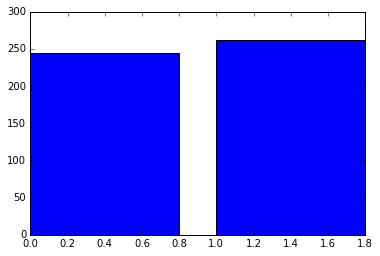